## Capstone 2 Data Wrangling 
### NBA Salary Predictor and Trade Suggestion
### Austin Cody

In [308]:
# importing modules
import pandas as pd
import matplotlib.pyplot as plt

In [309]:
# Loading nba_salaries.csv into pandas DataFrame
salaries = pd.read_csv('nba_salaries.csv')

In [310]:
# Basic info on each column
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         467 non-null    int64  
 1   Player Name        467 non-null    object 
 2   Salary             467 non-null    int64  
 3   Position           467 non-null    object 
 4   Age                467 non-null    int64  
 5   Team               467 non-null    object 
 6   GP                 467 non-null    int64  
 7   GS                 467 non-null    int64  
 8   MP                 467 non-null    float64
 9   FG                 467 non-null    float64
 10  FGA                467 non-null    float64
 11  FG%                466 non-null    float64
 12  3P                 467 non-null    float64
 13  3PA                467 non-null    float64
 14  3P%                454 non-null    float64
 15  2P                 467 non-null    float64
 16  2PA                467 non

In [311]:
#basic statistics
salaries.describe()

,Unnamed: 0,Salary,Age,GP,GS,MP,FG,FGA,FG%,3P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,467.000000,4.670000e+02,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,466.000000,467.000000,...,444.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000
mean,233.000000,8.416599e+06,25.820128,48.233405,22.650964,19.871306,3.351392,7.117773,0.465009,0.996574,...,0.753489,0.866809,2.662099,3.528051,2.107709,0.610493,0.379015,1.114133,1.702784,9.129979
std,134.955548,1.070812e+07,4.275113,24.807740,27.094577,9.548684,2.457836,5.020700,0.109547,0.880468,...,0.148659,0.746976,1.707984,2.277160,1.957517,0.399083,0.364387,0.830051,0.776957,6.906006
min,0.000000,5.849000e+03,19.000000,1.000000,0.000000,1.800000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,116.500000,1.782621e+06,23.000000,31.000000,1.000000,12.500000,1.600000,3.300000,0.417000,0.300000,...,0.691000,0.400000,1.400000,1.900000,0.800000,0.300000,0.100000,0.500000,1.200000,4.100000
50%,233.000000,3.722040e+06,25.000000,55.000000,8.000000,19.200000,2.700000,5.800000,0.455000,0.800000,...,0.769000,0.700000,2.300000,3.000000,1.400000,0.600000,0.300000,0.900000,1.700000,7.100000
75%,349.500000,1.063354e+07,29.000000,68.500000,45.500000,28.300000,4.300000,9.400000,0.507500,1.500000,...,0.844000,1.100000,3.500000,4.500000,2.900000,0.800000,0.500000,1.500000,2.200000,11.700000
max,466.000000,4.807001e+07,42.000000,83.000000,83.000000,41.000000,11.200000,22.200000,1.000000,4.900000,...,1.000000,5.100000,9.600000,12.500000,10.700000,3.000000,2.500000,4.100000,5.000000,33.100000


In [312]:
# in case I want to examine the entire dataframe in jupyter notebook later without pandas limiting the number of visible rows
pd.set_option('display.max_rows', None)

# displaying first 10 rows
salaries.head()

,Unnamed: 0,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,...,0.7,5.4,6.1,6.3,0.9,0.4,3.2,2.1,29.4,curryst01
1,1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,...,0.4,2.3,2.7,5.2,0.8,0.4,2.4,1.7,11.4,walljo01
2,2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,...,1.2,4.6,5.8,7.5,1.0,0.5,3.5,2.2,15.9,westbru01
3,3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,...,1.2,7.1,8.3,6.8,0.9,0.6,3.2,1.6,28.9,jamesle01
4,4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,...,0.4,6.3,6.7,5.0,0.7,1.4,3.3,2.1,29.1,duranke01


In [313]:
# transposing to more easily examine an individual player
salaries[salaries['Player Name'] == 'Dorian Finney-Smith'].T

,99
Unnamed: 0,99
Player Name,Dorian Finney-Smith
Salary,12939848
Position,PF
Age,29
Team,BRK/DAL
GP,66
GS,66
MP,30.4
FG,3.0


In [314]:
# Currently we have two unnecessary columns at the beginning and end of our DataFrame: 
# 'unnamed: 0' appears to be a number from zero to len(salaries).
# 'Player-additional' which is some sort of player-id.

# We will get rid of the 'unnamed: 0' column. It's not useful, even if we were to use it as an index.
# dropping first unnecessary column
salaries.drop('Unnamed: 0', axis=1, inplace=True)

In [315]:
# BEFORE eliminating the 'Player-additional' column  we need to make sure there are no duplicate player names.
# if there are duplicate player names then an id column such as this would be extremely important.

#checking if there are duplicate player names (will pull an error if there are duplicates)
assert salaries.duplicated('Player Name').sum() == 0

#Excellent, no player duplicates. Dropping the second unnecessary column
salaries.drop('Player-additional', axis=1, inplace=True)

In [316]:
# Many column names are abbreviated names of different statistics. Renaming will make our data more readable.
# pg, meaning 'per game', is so common in these stats that I left it in.

# all stats explained on https://www.basketball-reference.com/about/glossary.html

# renaming columns
salaries.rename(columns = {
    'Player Name':'name',
    'GP':'games_played',
    'GS':'games_started',
    'MP':'minutes_pg',
    'FG':'field_goals_pg', # includes any shot worth 2 or 3 points that is not a free throw
    'FGA':'field_goal_attempts_pg',
    'FG%':'field_goal_%',
    '3P':'3_pointers_pg',  # 3 point field goal
    '3PA':'3_point_attempts_pg',
    '3P%':'3_point_%',
    '2P':'2_pointers_pg', # 2 point field goal
    '2PA':'2_point_attempts_pg',
    '2P%':'2_point_%',
    'eFG%':'effective_field_goal_%', # field goal % adjusted by the fact that 3 point field goal attempts are worth more than 2 point field goal attempts
    'FT':'free_throws_pg',
    'FTA':'free_throw_attempts_pg',
    'FT%':'free_throw_%',
    'ORB':'o_rebounds_pg', # offensive
    'DRB':'d_rebounds_pg', # defensive
    'TRB':'total_rebounds_pg',
    'AST':'assists_pg',
    'STL':'steals_pg',
    'BLK':'blocks_pg',
    'TOV':'turnovers_pg',
    'PF':'personal_fouls_pg',
    'PTS':'points_pg'},
               inplace=True)

# lowercasing the remaining columns for uniformity
salaries.columns = salaries.columns.str.lower()

In [317]:
#checking all the columns
salaries[salaries.name=='Dorian Finney-Smith'].T

,99
name,Dorian Finney-Smith
salary,12939848
position,PF
age,29
team,BRK/DAL
games_played,66
games_started,66
minutes_pg,30.4
field_goals_pg,3.0
field_goal_attempts_pg,7.6


In [318]:
# Some players have played for multiple teams. If so, their team name uses the format 'ABC/DEF'.
# Some players have played multiple positions. If so, their position uses the format 'AB-CD'
# This might cause trouble later so we'll turn each value in the column into a list of team names by splitting using '/' or '-' as a delimiter.

# confirming that columns are of data type 'object' (they are)
print(salaries['team'].dtype)
print(salaries['position'].dtype)

#turning each value into a list
salaries['team'] = salaries['team'].str.split('/')
salaries['position'] = salaries['position'].str.split('-')

#checking if team split worked
print(salaries[salaries.name == 'Dorian Finney-Smith'].team) # player who played for two teams this season
print(salaries[salaries.name == 'LeBron James'].team)        # player who played for one team this season

#checking if position split worked
print(salaries[salaries.name == 'Mikal Bridges'].position) # player who played two positions this season
print(salaries[salaries.name == 'LeBron James'].position)  # player who played one position this season

# all of this worked ^

object
object
99    [BRK, DAL]
Name: team, dtype: object
3    [LAL]
Name: team, dtype: object
59    [SF, SG]
Name: position, dtype: object
3    [PF]
Name: position, dtype: object


In [319]:
# re-examining DataFrame
salaries.head()

,name,salary,position,age,team,games_played,games_started,minutes_pg,field_goals_pg,field_goal_attempts_pg,...,free_throw_%,o_rebounds_pg,d_rebounds_pg,total_rebounds_pg,assists_pg,steals_pg,blocks_pg,turnovers_pg,personal_fouls_pg,points_pg
0,Stephen Curry,48070014,[PG],34,[GSW],56,56,34.7,10.0,20.2,...,0.915,0.7,5.4,6.1,6.3,0.9,0.4,3.2,2.1,29.4
1,John Wall,47345760,[PG],32,[LAC],34,3,22.2,4.1,9.9,...,0.681,0.4,2.3,2.7,5.2,0.8,0.4,2.4,1.7,11.4
2,Russell Westbrook,47080179,[PG],34,"[LAL, LAC]",73,24,29.1,5.9,13.6,...,0.656,1.2,4.6,5.8,7.5,1.0,0.5,3.5,2.2,15.9
3,LeBron James,44474988,[PF],38,[LAL],55,54,35.5,11.1,22.2,...,0.768,1.2,7.1,8.3,6.8,0.9,0.6,3.2,1.6,28.9
4,Kevin Durant,44119845,[PF],34,"[BRK, PHO]",47,47,35.6,10.3,18.3,...,0.919,0.4,6.3,6.7,5.0,0.7,1.4,3.3,2.1,29.1


## Missing Values

In [320]:
# checking number of missing values in each column
print(salaries.isna().sum())

name                       0
salary                     0
position                   0
age                        0
team                       0
games_played               0
games_started              0
minutes_pg                 0
field_goals_pg             0
field_goal_attempts_pg     0
field_goal_%               1
3_pointers_pg              0
3_point_attempts_pg        0
3_point_%                 13
2_pointers_pg              0
2_point_attempts_pg        0
2_point_%                  4
effective_field_goal_%     1
free_throws_pg             0
free_throw_attempts_pg     0
free_throw_%              23
o_rebounds_pg              0
d_rebounds_pg              0
total_rebounds_pg          0
assists_pg                 0
steals_pg                  0
blocks_pg                  0
turnovers_pg               0
personal_fouls_pg          0
points_pg                  0
dtype: int64


In [321]:
# Every column containing missing values is a percentage column - interesting.
# My first hypothesis is that these players played so little that they didn't take shots.
# This would result in zero division when calculating the percentages and thus explain our missing values.
# Let's investigate.

In [322]:
# first examining the missing value in field_goal_%

salaries[salaries['field_goal_%'].isna()].T

# Alondes Williams is the person with missing field_goal_%. It looks like he didn't shoot any field goals.
# In fact, he only played for 5 minutes in a single game.

,436
name,Alondes Williams
salary,254446
position,[SG]
age,23
team,[BRK]
games_played,1
games_started,0
minutes_pg,5.0
field_goals_pg,0.0
field_goal_attempts_pg,0.0


In [323]:
# next examining missing values in 3_point_%

salaries[salaries['3_point_%'].isna()].T

# Very interesting. 13 players have missing 3_point_%
# All of them have 0 3_pointers_pg, but why? What do they have in common?
# Six of these players have 5 or fewer games_played which is a feasible explanation.
# The other seven players have position in common. They all play Center.
# Centers do not typically have the opportunity to shoot 3 pointers because they hover so close to the basket.

# This is starting to make sense.

,75,133,233,264,301,332,395,404,421,428,436,439,441
name,Mitchell Robinson,Mason Plumlee,Mark Williams,Bismack Biyombo,Udoka Azubuike,Daniel Gafford,Moses Brown,Dereon Seabron,Neemias Queta,Chima Moneke,Alondes Williams,Chris Silva,Braxton Key
salary,17045454,9080417,3722040,2905851,2174880,1930681,824041,511816,508891,500000,254446,211045,201802
position,[C],[C],[C],[C],[C],[C],[C],[SG],[C],[SF],[SG],[PF],[SF]
age,24,32,21,30,23,24,23,22,23,27,23,26,25
team,[NYK],"[LAC, CHO]",[CHO],[PHO],[UTA],[WAS],"[BRK, LAC]",[NOP],[SAC],[SAC],[BRK],[DAL],[DET]
games_played,59,79,43,61,36,78,36,5,5,2,1,1,3
games_started,58,60,17,14,4,47,1,0,0,0,0,0,0
minutes_pg,27.0,26.0,19.3,14.3,10.0,20.6,8.2,2.4,5.8,4.0,5.0,3.0,3.0
field_goals_pg,3.2,4.2,3.7,2.0,1.6,3.7,1.7,0.4,1.2,0.5,0.0,1.0,0.3
field_goal_attempts_pg,4.7,6.1,5.8,3.4,2.0,5.1,2.7,1.0,1.8,1.0,0.0,1.0,0.3


In [324]:
#next examining missing values in 2_point_%

salaries[salaries['2_point_%'].isna()]

# again these four players all played very few games.

,name,salary,position,age,team,games_played,games_started,minutes_pg,field_goals_pg,field_goal_attempts_pg,...,free_throw_%,o_rebounds_pg,d_rebounds_pg,total_rebounds_pg,assists_pg,steals_pg,blocks_pg,turnovers_pg,personal_fouls_pg,points_pg
403,Trevor Keels,520589,[SG],19,[NYK],3,0,2.7,0.3,1.3,...,NaN,0.0,0.7,0.7,0.0,0.0,0.0,0.0,0.0,1.0
436,Alondes Williams,254446,[SG],23,[BRK],1,0,5.0,0.0,0.0,...,NaN,0.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0
459,Stanley Umude,58493,[SG],23,[DET],1,0,2.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0
466,Jacob Gilyard,5849,[PG],24,[MEM],1,0,41.0,1.0,3.0,...,NaN,0.0,4.0,4.0,7.0,3.0,0.0,2.0,3.0,3.0


In [325]:
#next examining missing value in effective_field_goal_%

salaries[salaries['effective_field_goal_%'].isna()]

#Alondes Williams again - the person who didn't take any shots.

,name,salary,position,age,team,games_played,games_started,minutes_pg,field_goals_pg,field_goal_attempts_pg,...,free_throw_%,o_rebounds_pg,d_rebounds_pg,total_rebounds_pg,assists_pg,steals_pg,blocks_pg,turnovers_pg,personal_fouls_pg,points_pg
436,Alondes Williams,254446,[SG],23,[BRK],1,0,5.0,0.0,0.0,...,NaN,0.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0


In [326]:
#lastly examining free_throw_%
salaries[salaries['free_throw_%'].isna()].T

#these players again have a relatively low number of games_played

,221,247,254,344,356,358,393,397,403,404,...,436,437,439,440,444,449,453,454,458,466
name,Dylan Windler,Sterling Brown,Joe Wieskamp,Ryan Arcidiacono,Leandro Bolmaro,Jared Butler,Justin Champagnie,PJ Dozier,Trevor Keels,Dereon Seabron,...,Alondes Williams,Donovan Williams,Chris Silva,Tyler Dorsey,Devon Dotson,Xavier Moon,Frank Jackson,Deonte Burton,Jordan Schakel,Jacob Gilyard
salary,4037277,3122602,2909261,1836090,1709300,1674655,853241,784654,520589,511816,...,254446,239822,211045,201802,169630,116986,113114,105522,96514,5849
position,[SF],[SF],[SF],[PG],[SF],[PG],[SF],[SF],[SG],[SG],...,[SG],[SG],[PF],[SF],[PG],[SG],[PG],[PF],[SF],[PG]
age,26,27,23,28,22,22,21,26,19,22,...,23,21,26,26,23,28,24,29,24,24
team,[CLE],[LAL],[TOR],"[NYK, POR]",[UTA],[OKC],"[BOS, TOR]",[SAC],[NYK],[NOP],...,[BRK],[ATL],[DAL],[DAL],[WAS],[LAC],[UTA],[SAC],[WAS],[MEM]
games_played,3,4,9,20,14,6,5,16,3,5,...,1,2,1,3,6,4,1,2,2,1
games_started,0,0,0,4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
minutes_pg,3.3,6.0,5.6,8.6,4.9,12.8,6.8,4.9,2.7,2.4,...,5.0,2.0,3.0,2.7,8.8,5.0,5.0,3.0,3.0,41.0
field_goals_pg,0.7,0.0,0.3,0.5,0.2,2.5,1.0,0.6,0.3,0.4,...,0.0,1.0,1.0,1.3,0.2,0.8,0.0,0.0,0.5,1.0
field_goal_attempts_pg,1.0,1.0,1.6,1.9,1.4,5.3,3.0,2.1,1.3,1.0,...,0.0,2.5,1.0,1.7,1.7,2.3,3.0,1.0,1.0,3.0


In [327]:
#### Missing Values conclusion

# Every missing value was the result of zero divison from a player not taking a field goal or a free throw
# However, not every missing value was the result of these players playing few games (the Centers taking no 3 point shots)
# I think imputing the values as 0% makes the most sense in this case because they didn't make any attempts.
# Deleting the entire player's row doesn't make sense because they may have compensated by having a high 2 point percentage.
# Also I think dropping players who have played 10 games or fewer will reduce the skew in our data. 

In [328]:
#impute missing percentage values as 0
salaries.fillna(0.0, inplace = True)

#check if any are left using .sum().sum() because it tallies up the series of tallied up na values
assert salaries.isna().sum().sum() == 0

In [329]:
#drop players with fewer than 10 games played

#counting how many players have fewer than 10 games
print((salaries['games_played'] < 10).sum())

#dropping those rows
salaries.drop(salaries[salaries['games_played'] < 10].index, inplace=True)

print((salaries['games_played'] < 10).sum())

62
0


## Categorical Data

In [330]:
# Categorical Data (position and team)
# We should have 5 positions and 30 NBA teams

#set comprehensions to identify unique positions and teams
position_set = {position for position_list in salaries['position'] for position in position_list}
team_set = {team for team_list in salaries['team'] for team in team_list}

assert len(position_set) == 5
assert len(team_set) == 30

#Our categorical data appears to be good.

## Outliers

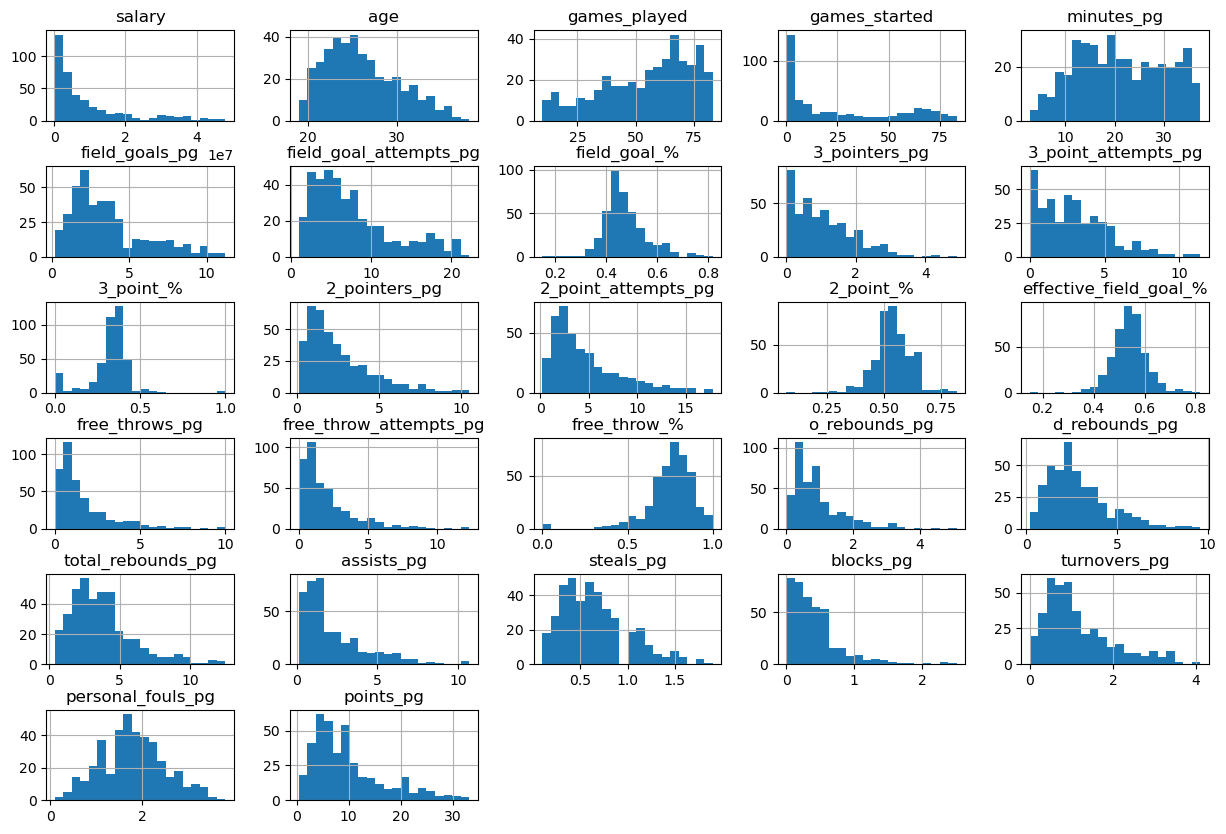

In [331]:
# Visualizing data to check for outliers
salaries.hist(bins=20,figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

In [332]:
# A few people have a perfect 3 point percentage? that cannot be right.
salaries[salaries['3_point_%'] > 0.9].T

,114,349
name,DeAndre Jordan,Nick Richards
salary,10733758,1782621
position,[C],[C]
age,34,25
team,[DEN],[CHO]
games_played,39,65
games_started,8,9
minutes_pg,15.0,18.7
field_goals_pg,2.3,3.0
field_goal_attempts_pg,2.9,4.8


In [334]:
#This is incorrect, looks like they shot 0 threes
salaries['3_point_%'].replace(1.0, 0.0, inplace=True)

In [336]:
salaries.head()

,name,salary,position,age,team,games_played,games_started,minutes_pg,field_goals_pg,field_goal_attempts_pg,...,free_throw_%,o_rebounds_pg,d_rebounds_pg,total_rebounds_pg,assists_pg,steals_pg,blocks_pg,turnovers_pg,personal_fouls_pg,points_pg
0,Stephen Curry,48070014,[PG],34,[GSW],56,56,34.7,10.0,20.2,...,0.915,0.7,5.4,6.1,6.3,0.9,0.4,3.2,2.1,29.4
1,John Wall,47345760,[PG],32,[LAC],34,3,22.2,4.1,9.9,...,0.681,0.4,2.3,2.7,5.2,0.8,0.4,2.4,1.7,11.4
2,Russell Westbrook,47080179,[PG],34,"[LAL, LAC]",73,24,29.1,5.9,13.6,...,0.656,1.2,4.6,5.8,7.5,1.0,0.5,3.5,2.2,15.9
3,LeBron James,44474988,[PF],38,[LAL],55,54,35.5,11.1,22.2,...,0.768,1.2,7.1,8.3,6.8,0.9,0.6,3.2,1.6,28.9
4,Kevin Durant,44119845,[PF],34,"[BRK, PHO]",47,47,35.6,10.3,18.3,...,0.919,0.4,6.3,6.7,5.0,0.7,1.4,3.3,2.1,29.1


In [337]:
salaries.to_csv('nba_salaries_cleaned.csv', index=False)